# gender-classifier


In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("gender-classifier-DFE-791531.csv" ,encoding='latin1')

In [61]:
df.head(4)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)


In [62]:
df.shape

(20050, 26)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

EDA

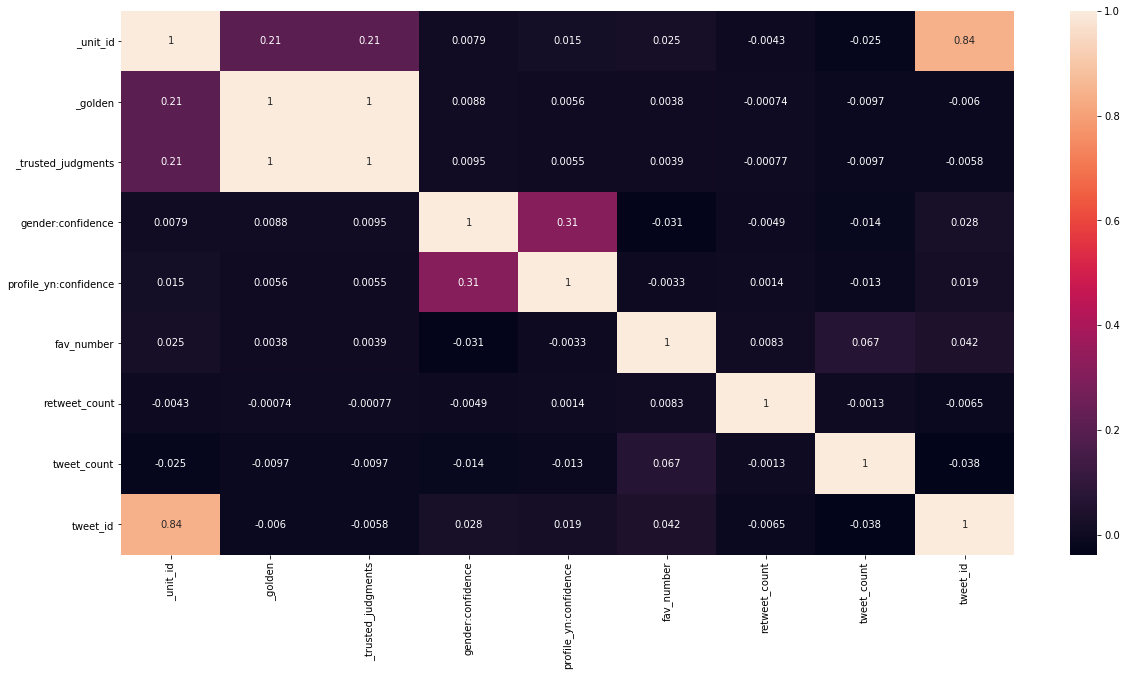

In [64]:
import seaborn as sns 
sns.heatmap(df.corr(),annot = True)
plt.rcParams["figure.figsize"]=20,10

In [65]:
df.corr().transpose()

,_unit_id,_golden,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
_unit_id,1.000000,0.208055,0.207651,0.007918,0.015168,0.024878,-0.004337,-0.024809,0.844887
_golden,0.208055,1.000000,0.998592,0.008818,0.005592,0.003794,-0.000744,-0.009669,-0.005985
_trusted_judgments,0.207651,0.998592,1.000000,0.009550,0.005543,0.003851,-0.000765,-0.009703,-0.005781
gender:confidence,0.007918,0.008818,0.009550,1.000000,0.313628,-0.030889,-0.004947,-0.013558,0.027901
profile_yn:confidence,0.015168,0.005592,0.005543,0.313628,1.000000,-0.003256,0.001376,-0.012665,0.019044
fav_number,0.024878,0.003794,0.003851,-0.030889,-0.003256,1.000000,0.008274,0.066733,0.041788
retweet_count,-0.004337,-0.000744,-0.000765,-0.004947,0.001376,0.008274,1.000000,-0.001263,-0.006466
tweet_count,-0.024809,-0.009669,-0.009703,-0.013558,-0.012665,0.066733,-0.001263,1.000000,-0.037836
tweet_id,0.844887,-0.005985,-0.005781,0.027901,0.019044,0.041788,-0.006466,-0.037836,1.000000


Missing values

In [66]:
df.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [67]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [68]:
df['gender:confidence'].value_counts()

1.0000    13926
0.0000       71
0.6691       31
0.6709       30
0.6591       30
          ...  
0.6379        1
0.6322        1
0.6911        1
0.6971        1
0.6873        1
Name: gender:confidence, Length: 923, dtype: int64

In [69]:
df = df[df['gender:confidence'] >=0.99]

In [70]:
df['gender:confidence'].value_counts()

1.0    13926
Name: gender:confidence, dtype: int64

In [71]:
df['gender'].value_counts()

female     5367
male       4653
brand      3784
unknown     122
Name: gender, dtype: int64

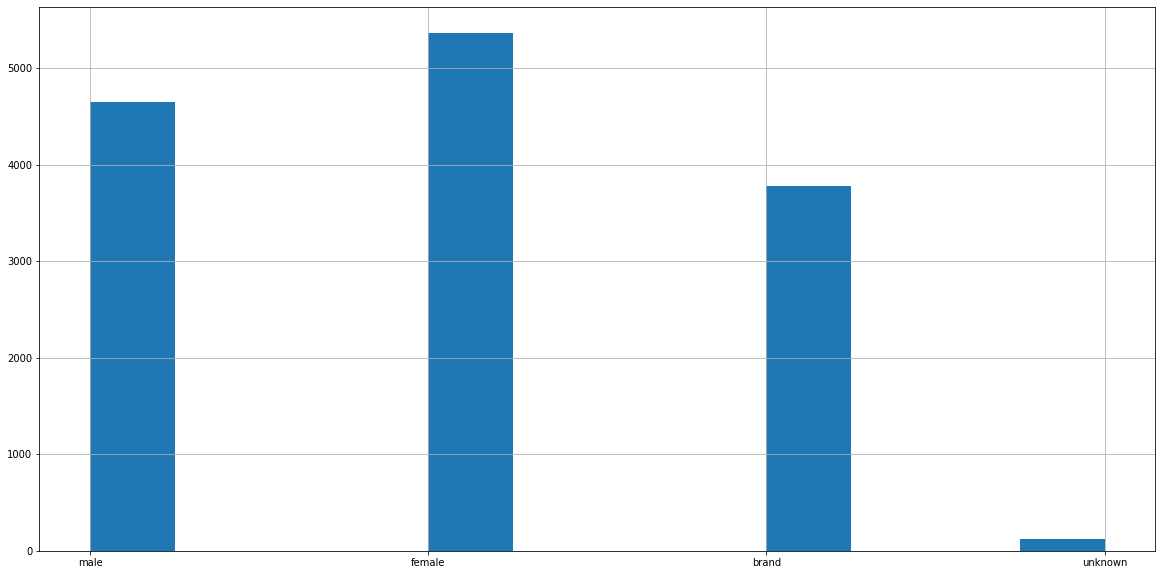

In [72]:
df['gender'].hist(bins=12)

Filling Missng Values

In [73]:
df['gender'].describe()

count      13926
unique         4
top       female
freq        5367
Name: gender, dtype: object

In [74]:
df['gender'].fillna(df['gender'].mode()[0])

0          male
1          male
3          male
4        female
5        female
          ...  
20044    female
20045    female
20046      male
20047      male
20049    female
Name: gender, Length: 13926, dtype: object

In [75]:
df.shape

(13926, 26)

In [76]:
df['gender'].isnull().sum()

0

Replacing unknown values

In [77]:
df['gender'].replace(to_replace = 'unknown' ,value = 'male' ,inplace = True)

In [78]:
df['gender'].value_counts()

female    5367
male      4775
brand     3784
Name: gender, dtype: int64

In [79]:
df.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           29
gender                       0
gender:confidence            0
profile_yn                   0
profile_yn:confidence        0
created                      0
description               2081
fav_number                   0
gender_gold              13897
link_color                   0
name                         0
profile_yn_gold          13897
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              13795
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            4666
user_timezone             4969
dtype: int64

In [80]:
df['description'].describe()

count                                                 11845
unique                                                11179
top       You can be spiritually empowered, financially ...
freq                                                     28
Name: description, dtype: object

In [81]:
df['description'].fillna(df['description'].mode()[0],inplace = True)

In [84]:
df.shape

(13926, 26)

removing nan value

In [89]:
df.dropna()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone


In [54]:
df.head(4)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [90]:
df.shape

(13926, 26)

In [91]:
import re 


In [92]:
def normalize_text(text):
    
    text = str(text)
    text = text.lower()
        
    text = re.sub('\s\W',' ',text)
    text = re.sub('\W\s',' ',text)
        
    text = re.sub('\s+',' ',text)
    text = re.sub('[^\x00-\x7F]+',' ', text)
    text = re.sub('https?:\/\/.*[\r\n]*', ' ', text)
    text = re.sub('[?!+%{}:;.,"\'()\[\]_]', '',text)
    text = re.sub('\s+',' ',text)
    return text

df['text_norm'] = [normalize_text(s) for s in df['text']]
df['description_norm'] = [normalize_text(s) for s in df['description']]

In [93]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,text_norm,description_norm
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0,yes,1.0,12/5/13 1:48,...,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,robbie e responds to critics after win against...,i sing my own rhythm
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0,yes,1.0,10/1/12 13:51,...,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada),it felt like they were my friends and i was l...,im the author of novels filled with family dra...
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0,yes,1.0,6/11/09 22:39,...,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),hi jordanspieth looking at the url do you use ...,mobile guy 49ers shazam google kleiner perkins...
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0,yes,1.0,4/16/14 13:23,...,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN,watching neighbours on sky catching up with th...,ricky wilson the best frontman/kaiser chiefs t...
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0,yes,1.0,3/11/10 18:14,...,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada),ive seen people on the train with lamps chairs...,you dont know me


In [94]:
df.shape

(13926, 28)

In [95]:
df['description_norm']

0                                     i sing my own rhythm
1        im the author of novels filled with family dra...
3        mobile guy 49ers shazam google kleiner perkins...
4        ricky wilson the best frontman/kaiser chiefs t...
5                                         you dont know me
                               ...                        
20044                                    i love memyself&i
20045                                                   rp
20046    whatever you like its not a problem at all 9/1...
20047    #teambarcelona you look lost so you should fol...
20049                        teamwork makes the dream work
Name: description_norm, Length: 13926, dtype: object

In [96]:
df.reset_index(inplace = True)

In [97]:
df.columns

Index(['index', '_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone',
       'text_norm', 'description_norm'],
      dtype='object')

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#vectorizer = vectorizer.fit(df.ix[train_rows, :]["text_norm"])
vectorizer.fit_transform(df['text_norm'])

<13926x26811 sparse matrix of type '<class 'numpy.int64'>'
	with 185850 stored elements in Compressed Sparse Row format>

In [99]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

LabelEncoder

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [101]:
cat_col = ['_unit_state','text_norm', 'description_norm','sidebar_color','link_color', 'name', 'profileimage',
          'created', 'description', 'profile_yn','gender',]

In [102]:
for each_col in cat_col:
    df[each_col] = le.fit_transform(df[each_col])

sklearn.neural_network

In [103]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [104]:
X = df[['_golden', '_unit_state', '_trusted_judgments',
        'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created',  'fav_number',
       'link_color', 'name', 'profileimage', 'retweet_count', 'sidebar_color',
        'tweet_count',  'tweet_id', 
       'text_norm', 'description_norm']].values
y = df['gender'].values

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [107]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [108]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [109]:
clf.predict_proba(X_test)

array([[0.31640899, 0.58072255, 0.10286847],
       [0.31640899, 0.58072255, 0.10286847],
       [0.31640899, 0.58072255, 0.10286847],
       ...,
       [0.31640899, 0.58072255, 0.10286847],
       [0.31640899, 0.58072255, 0.10286847],
       [0.31640899, 0.58072255, 0.10286847]])

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
accuracy_score(y_test, y_pred)

0.38008616562948777

In [115]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [116]:
nb = MultinomialNB()
nb = nb.fit(X_train, y_train)
print(classification_report(y_test, nb.predict(X_test)))
accuracy_score(y_test, nb.predict(X_test))

              precision    recall  f1-score   support

           0       0.51      0.38      0.44      1144
           1       0.65      0.18      0.29      1588
           2       0.38      0.75      0.51      1446

    accuracy                           0.44      4178
   macro avg       0.51      0.44      0.41      4178
weighted avg       0.52      0.44      0.40      4178



0.4360938247965534

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# define the  model
model = Sequential()
model.add(Dense(10, input_dim=X_train_enc.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train_enc, y_train_enc, epochs=100, batch_size=16, verbose=2)
# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))